# Test Dataset
test dataset is corresponding with the test case as in the reference

`pyvol` can provide fast and efficient local volatility surface corresponding to the market prices.

In [1]:
strikes = [355.0, 357.5, 360.0, 362.5, 365.0, 367.5, 370.0, 372.5, 375.0, 377.5, 380.0, 382.5, 385.0, 387.5, 390.0]
dt = 1/365.0
ttms = [6 * dt, 34 * dt, 62 * dt]
initial_price = 356.01
r = 0.0151
market_prices = [3.61, 2.20, 1.22, 0.62, 0.25, 0.11, 0.05, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
                7.52, 6.09, 4.85, 3.82, 2.95, 2.18, 1.60, 1.14, 0.79, 0.54, 0.39, 0.27, 0.21, 0.15, 0.12,
                10.00, 8.55, 7.04, 6.35, 5.29, 4.37, 3.32, 2.68, 2.30, 1.74, 1.47, 1.16, 0.91, 0.72, 0.55]

from pyvol import LocalVolatilitySurface, option_type
span = 3
interval = 100
surface= LocalVolatilitySurface(initial_price, ttms, strikes, market_prices, option_type.call, dt, r, span, interval)
vol= surface.LocalVol()
numerical_value = surface.VanillaFD(vol)

In [2]:
numerical_value

array([3.44290703e+00, 2.19082390e+00, 1.25680889e+00, 7.16534725e-01,
       3.94307282e-01, 1.93123020e-01, 9.12074273e-02, 4.68586704e-02,
       2.07714983e-02, 8.20246644e-03, 4.03175472e-03, 1.69136417e-03,
       6.19374697e-04, 2.62454850e-04, 1.08666359e-04, 7.43320716e+00,
       6.05320355e+00, 4.82120926e+00, 3.79850418e+00, 2.95100898e+00,
       2.22916597e+00, 1.64635302e+00, 1.21713303e+00, 8.68699592e-01,
       5.95566016e-01, 4.16427482e-01, 2.80791431e-01, 1.80273358e-01,
       1.16185878e-01, 7.43363708e-02, 1.00137332e+01, 8.58377498e+00,
       7.27155252e+00, 6.12662009e+00, 5.12612041e+00, 4.23208572e+00,
       3.45868122e+00, 2.82860012e+00, 2.27986259e+00, 1.80910436e+00,
       1.44711424e+00, 1.14333488e+00, 8.88902827e-01, 6.92429229e-01,
       5.39299264e-01])

## Data Visualization

### Numerical Values vs Market Data

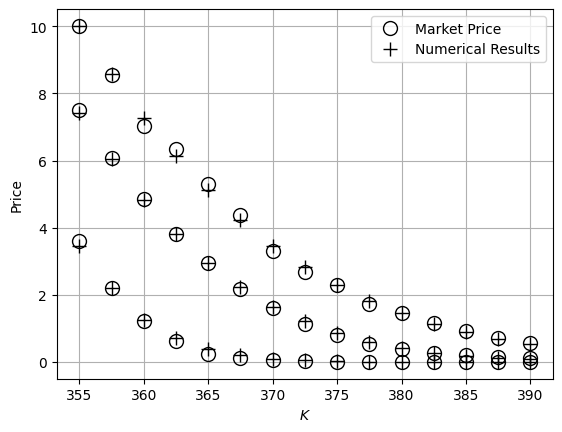

In [3]:
import matplotlib.pyplot as plt
import numpy as np
n_k = len(strikes)
n_t = len(ttms)
plot_strikes = np.zeros(n_t * n_k) 
for k in range(n_t):
    plot_strikes[n_k * k: n_k * (k + 1)] = strikes

plt.figure()
plt.plot(plot_strikes, market_prices, 'ko', linewidth=1, markersize=10, fillstyle = 'none')
plt.plot(plot_strikes, numerical_value, 'k+', linewidth=1, markersize=10)
plt.legend(['Market Price', 'Numerical Results'], loc='best')
plt.xlabel('$K$')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Local Volatility Interpolator: Delaunay 2D Triangulation Interpolation

In [4]:
import pandas as pd
vol_data = surface.SurfaceData(vol)
prices = np.linspace(0, span*initial_price, span * interval + 1)
times = np.linspace(0, ttms[-1], int(round(ttms[-1]/dt)) + 1)
df = pd.DataFrame(vol_data.T, columns = prices, index = times)
df

,0.0000,3.5601,7.1202,10.6803,14.2404,17.8005,21.3606,24.9207,28.4808,32.0409,...,1035.9891,1039.5492,1043.1093,1046.6694,1050.2295,1053.7896,1057.3497,1060.9098,1064.4699,1068.0300
0.000000,0.100000,0.116336,0.077228,0.026000,0.068000,0.100191,0.178161,0.030995,0.035333,0.077333,...,0.173330,0.730000,0.173295,0.477515,0.306411,0.135307,0.982000,0.227330,0.439492,0.268388
0.002740,0.100014,0.117540,0.074010,0.026667,0.068667,0.100205,0.179365,0.027778,0.036000,0.078000,...,0.170614,0.748000,0.156073,0.474799,0.303695,0.132591,1.000000,0.234700,0.436776,0.265672
0.005479,0.100027,0.118745,0.070792,0.027333,0.069333,0.100218,0.180569,0.024560,0.036667,0.078667,...,0.167898,0.766000,0.138851,0.472083,0.300979,0.129875,0.982778,0.242070,0.434060,0.262956
0.008219,0.100041,0.119949,0.067574,0.028000,0.070000,0.100232,0.181774,0.021342,0.037333,0.079333,...,0.165183,0.784000,0.136106,0.469368,0.298263,0.127159,0.965556,0.249440,0.431344,0.260240
0.010959,0.100055,0.121153,0.064357,0.028667,0.070667,0.100245,0.182978,0.018124,0.038000,0.080000,...,0.162467,0.802000,0.141550,0.466652,0.295548,0.124443,0.948333,0.256810,0.428628,0.257524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.158904,0.110315,0.093317,0.022667,0.064667,0.100123,0.172140,0.047085,0.032000,0.074000,0.100314,...,0.640000,0.259406,0.491095,0.319991,0.148887,0.892000,0.190480,0.453072,0.281968,0.110864
0.161644,0.111520,0.090099,0.023333,0.065333,0.100136,0.173344,0.043867,0.032667,0.074667,0.100327,...,0.658000,0.242184,0.488379,0.317275,0.146171,0.910000,0.197850,0.450356,0.279252,0.108148
0.164384,0.112724,0.086881,0.024000,0.066000,0.100150,0.174548,0.040649,0.033333,0.075333,0.100341,...,0.676000,0.224962,0.485663,0.314559,0.143455,0.928000,0.205220,0.447640,0.276536,0.105432
0.167123,0.113928,0.083664,0.024667,0.066667,0.100164,0.175753,0.037431,0.034000,0.076000,0.100355,...,0.694000,0.207740,0.482947,0.311843,0.140739,0.946000,0.212590,0.444924,0.273820,0.102716


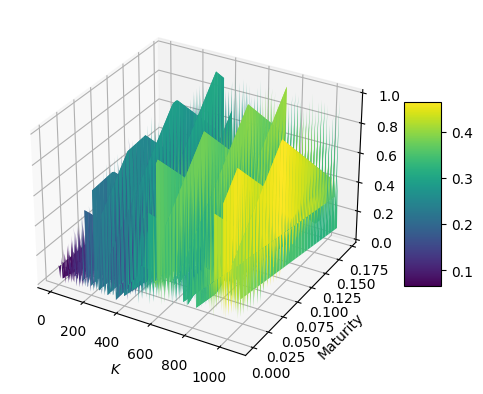

In [13]:
x, y = np.meshgrid(df.columns.astype(float),
                   df.index.astype(float))
fig = plt.figure()
ax  = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(x, y, df.values, cmap = 'viridis')
ax.set_xlabel("$K$")
ax.set_ylabel('Maturity')
ax.set_zlabel('$\sigma$')
fig.colorbar(surf, shrink=0.5, aspect=5, ax = ax)
plt.show()